# Appendix A.1 - Slow Roll plots against Planck Data

Here we plot SR inflation exact predictions for $r$ and $n_s$ against data from the Planck Legacy Archive file

COM_CosmoParams_base-plikHM-TTTEEE-lowl-lowE_R3.00.zip,

accessed 29/10/2020

In [1]:
import matplotlib.pyplot as py
import numpy as np
import getdist as gs #specialist package for interacting with Planck data
import os
from getdist import plots, loadMCSamples
from pathlib import Path

In [2]:
#paths are written as the following
pathbase = "C:/Users/Jacob/Documents/aWarwicka/4th year Project/Python tasks/Getdist/base_r/plikHM_TTTEEE_lowl_lowE"
dirs = os.listdir(pathbase)
#os.listdir returns a list of strings
dirs[2], dirs[10]

('base_r_plikHM_TTTEEE_lowl_lowE.likelihoods',
 'base_r_plikHM_TTTEEE_lowl_lowE_1.txt')

In [3]:
basepth = "C:/Users/Jacob/Documents/aWarwicka/4th year Project/Python tasks/Getdist/base_r/plikHM_TTTEEE_lowl_lowE" #specify folder destination
root = "base_r_plikHM_TTTEEE_lowl_lowE" #local file

samps = loadMCSamples(os.path.join(basepth, root), settings={'ignore_rows':0.3}) #loads relevant data

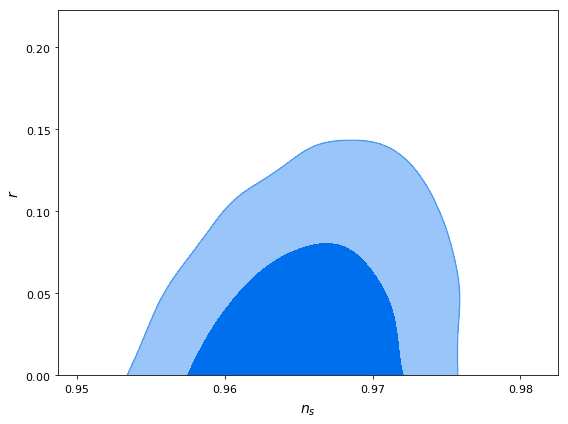

In [4]:
g = plots.get_single_plotter(chain_dir=Path(basepth), width_inch=8)
g.plot_2d(samps,'ns', 'r', filled=True);

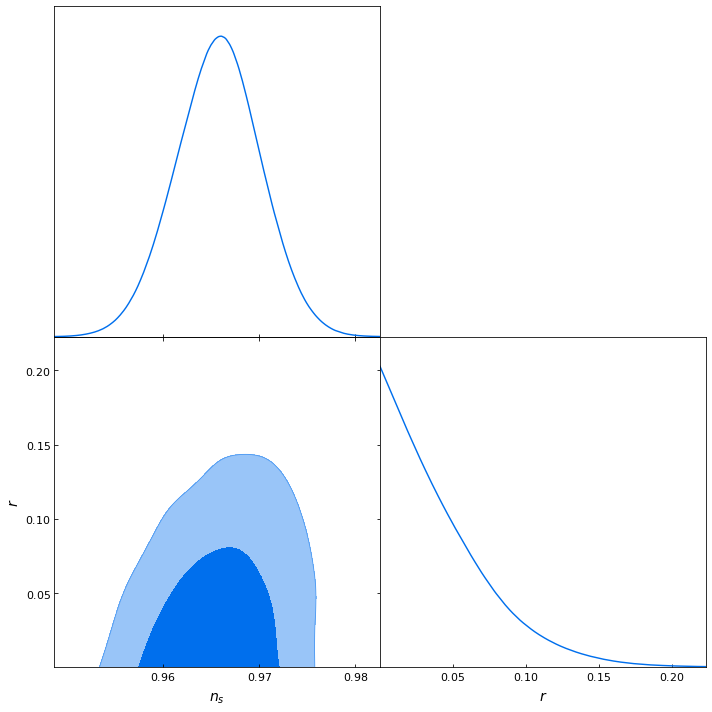

In [5]:
#This code produces plots of the n_s and r distributions

g = plots.get_subplot_plotter(subplot_size = 5)
g.triangle_plot(samps, ['ns', 'r'], filled=True)

In [21]:
g.export('marginals.png')
#only run to save triangle plot

Now we will add the known $r$ and $n_s$ paths for a range of $N$ values corresponding to sensible times at the beginning of inflation - here I have chosen $N \in [60, 70]$ to start off

In [6]:
#We choose a range of N values as the integers between and including 60 and 70. Because this code is very fast,
#I have decided to define Nrange as a list, as opposed to a generator like range()'s output, for ease of the novice user
Nrange = [N for N in range(60, 71)]

def params_for_m(m):
    '''Using the SR formulation, we calculate n_s and r for various N values, 
    all for fixed exponent m in potential ϕ^m'''
    #
    ns = []
    r = []
    for N in Nrange:
        ns.append(1 - (0.5*m+1)/(N + 0.25*m))
        r.append((4*m)/(N+0.5))
    return (ns, r)

def plot_for_m(m, mstring = None, star = True):
    '''This is a quick automation of plotting we will use below, plottting r against n_s. The second input
    is the label for the plot, while the third input toggles between highlighting the endpoints with an asterisk
    or not so if False'''
    py.plot(params_for_m(m)[0], params_for_m(m)[1], label =  mstring)
    if star:
        py.plot(params_for_m(m)[0][0], params_for_m(m)[1][0], '*')
#asterisks mark the point on each m interval corresponding to N = 60

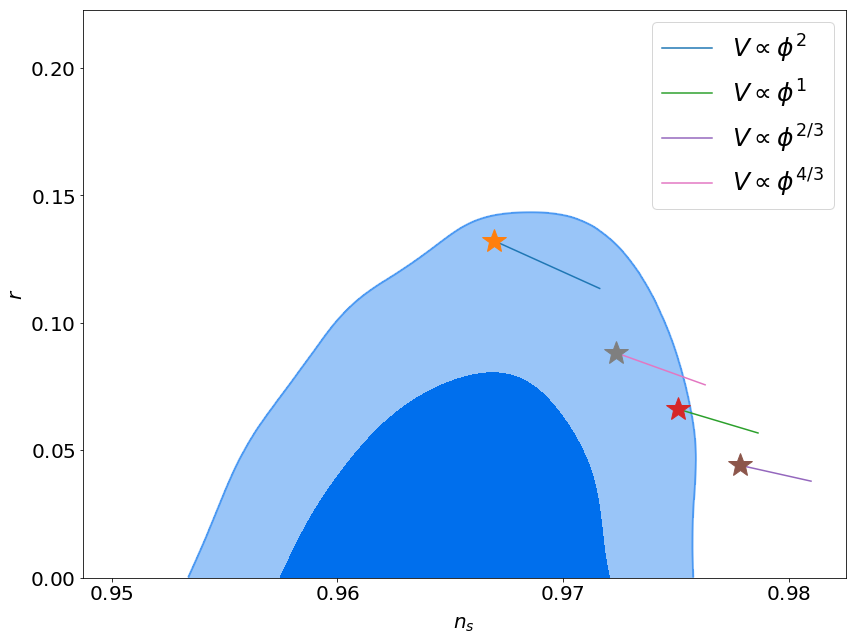

In [9]:
g = plots.get_single_plotter(chain_dir=Path(basepth), width_inch=12)
g.settings.axes_fontsize = 20 #stylistic - optional
g.settings.axes_labelsize = 20 #stylistic - optional
g.plot_2d(samps,'ns', 'r', filled=True);

plot_for_m(2, '$V \propto \phi ^{2}$')
plot_for_m(1, '$V \propto \phi ^{1}$')
plot_for_m(2/3, '$V \propto \phi ^{2/3}$')
plot_for_m(4/3, '$V \propto \phi ^{4/3}$')

py.legend()

In [9]:
g.export('SRcomparison.png')

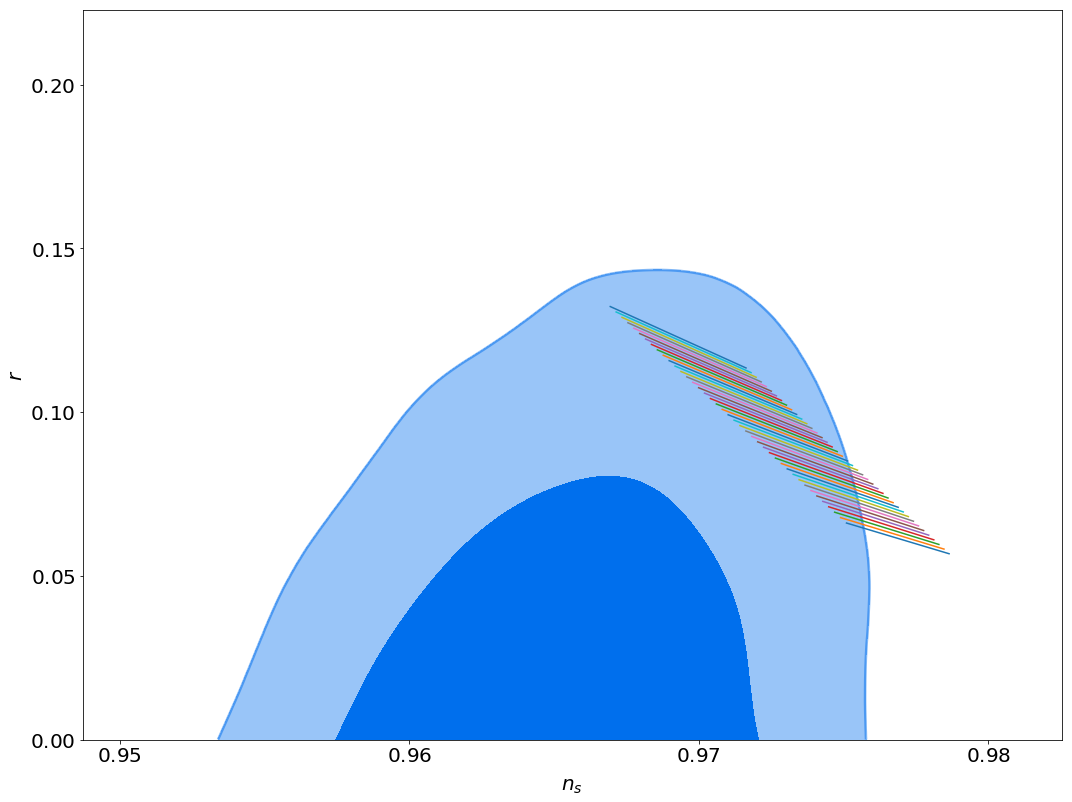

In [10]:
#Here I plot a greater density of predictions
m_bottom = 1
m_top = 2
number_of_lines = 41

g = plots.get_single_plotter(chain_dir=Path(basepth), width_inch=15)
g.settings.axes_fontsize = 20
g.settings.axes_labelsize = 20
g.plot_2d(samps,'ns', 'r', filled=True);

for m in np.linspace(m_bottom, m_top, number_of_lines):
    plot_for_m(m, star = False)

In [11]:
g.export('SRcomparison_with_m_spectrum.png')

Text(0, 0.5, '$r$')

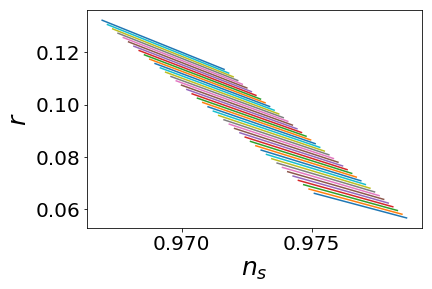

In [11]:
for m in np.linspace(1, 2, 41):
    plot_for_m(m, star = False)
py.xlabel('$n_s$')
py.ylabel('$r$')

In [12]:
g.export('SRmspectrum.png')